In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 70 #define 300 dpi for saving figures

import seaborn as sns
## here are some settings 
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':70}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [52]:
# Tells matplotlib to display images inline instead of a new window
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from time import time
import timeit #imports timeit module

In [65]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
df = pd.read_csv('../RiverRoad_Quan_RF.csv')
X = df.drop(['GRID_ID', 'wetland_type', 'wetland', 'FID_RiverRd_AOI'], axis=1)
y = df.FID_RiverRd_AOI

## Decision Tree Classifier Model(With Gini and Entopy Classifiers)

([<matplotlib.axis.XTick at 0x147ba558a30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

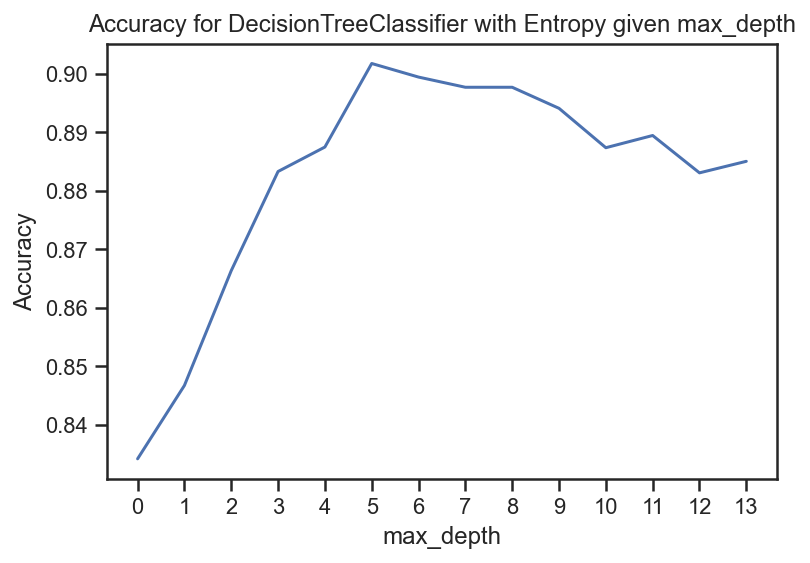

In [35]:
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
score_list = []
for i in range(1, 15):
    model = DecisionTreeClassifier(max_depth=i, criterion="entropy")
    scores = cross_val_score(model, X, y, cv=crossvalidation)
    score_list.append(scores.mean())
plt.plot(range(len(score_list)), score_list)
plt.title("Accuracy for DecisionTreeClassifier with Entropy given max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(range(len(score_list)))

([<matplotlib.axis.XTick at 0x147ba64cc10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

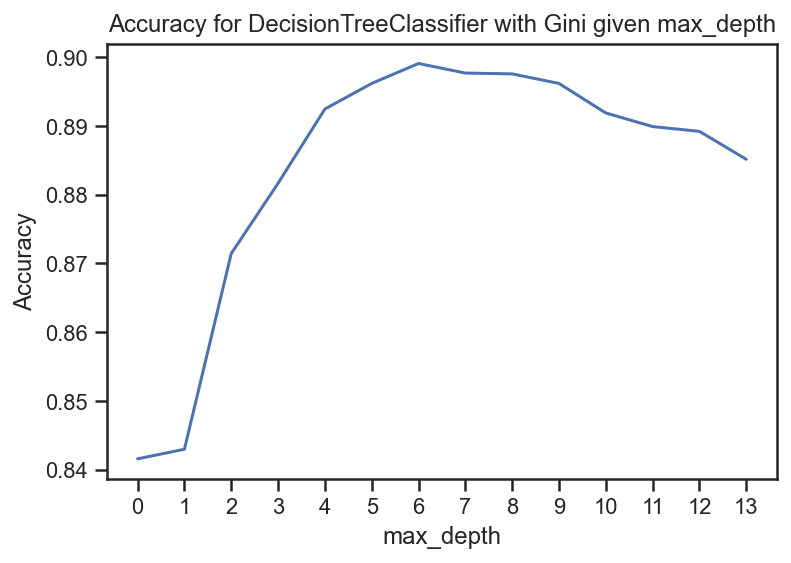

In [43]:
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
score_list = []
for i in range(1, 15):
    model = DecisionTreeClassifier(max_depth=i, criterion="gini")
    scores = cross_val_score(model, X, y, cv=crossvalidation)
    score_list.append(scores.mean())
plt.plot(range(len(score_list)), score_list)
plt.title("Accuracy for DecisionTreeClassifier with Gini given max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(range(len(score_list)))

In [39]:
start_time = timeit.default_timer()
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
model = DecisionTreeClassifier(max_depth=6) #criterion='gini'
scores = cross_val_score(model, X, y, cv=crossvalidation)
print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))
elapsed = timeit.default_timer() - start_time
print(f"{elapsed} Seconds")

Accuracy of each fold: 
 [0.90017411 0.8960511  0.89547038 0.90127758 0.88850174]

Avg accuracy: 0.8962949855847949
1.7423267999997734 Seconds


In [41]:
start_time = timeit.default_timer()
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
model = DecisionTreeClassifier(max_depth=6, criterion='entropy') 
scores = cross_val_score(model, X, y, cv=crossvalidation)
print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))
elapsed = timeit.default_timer() - start_time
print(f"{elapsed} Seconds")

Accuracy of each fold: 
 [0.89669182 0.90301974 0.90127758 0.9047619  0.90069686]

Avg accuracy: 0.9012895828319862
2.0633053000001382 Seconds


## Bagging: using all features

In [46]:
start_time = timeit.default_timer()
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
model = RandomForestClassifier(max_features = 60, random_state = 2)
scores = cross_val_score(model, X, y, cv=crossvalidation)
print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))
elapsed = timeit.default_timer() - start_time
print(f"{elapsed} Seconds")

Accuracy of each fold: 
 [0.92396982 0.92276423 0.91463415 0.91347271 0.91463415]

Avg accuracy: 0.9178950093124181
278.2864086999998 Seconds


## Random Forests: use sqrt(p) for classification

In [48]:
start_time = timeit.default_timer()
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
model = RandomForestClassifier(max_features = 7, random_state = 2)
scores = cross_val_score(model, X, y, cv=crossvalidation)
print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))
elapsed = timeit.default_timer() - start_time
print(f"{elapsed} Seconds")

Accuracy of each fold: 
 [0.92571097 0.91695703 0.91405343 0.91695703 0.91347271]

Avg accuracy: 0.9174302310140255
30.46814200000017 Seconds


## An AdaBoost Classifier

In [49]:
start_time = timeit.default_timer()
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
model = AdaBoostClassifier(n_estimators=500, learning_rate = 0.1, algorithm="SAMME.R", random_state=2)
scores = cross_val_score(model, X, y, cv=crossvalidation)
print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))
elapsed = timeit.default_timer() - start_time
print(f"{elapsed} Seconds")

Accuracy of each fold: 
 [0.90597795 0.90243902 0.90011614 0.90360046 0.89082462]

Avg accuracy: 0.9005916401921669
165.3692105999994 Seconds


## Gradient Boosting for classification

In [50]:
start_time = timeit.default_timer()
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
model =  GradientBoostingClassifier(n_estimators = 500, 
                                           learning_rate = 0.1, 
                                           max_depth = 4, 
                                           random_state = 2)
scores = cross_val_score(model, X, y, cv=crossvalidation)
print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))
elapsed = timeit.default_timer() - start_time
print(f"{elapsed} Seconds")

Accuracy of each fold: 
 [0.92977365 0.93321719 0.91986063 0.92392567 0.92218351]

Avg accuracy: 0.9257921284958641
503.0423307000001 Seconds


## Classification Trees

In [73]:
start_time = timeit.default_timer()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

classification_tree_carseats = DecisionTreeClassifier(max_depth = 6)
clf = classification_tree_carseats.fit(X_train, y_train)
print(f"Accuracy: {classification_tree_carseats.score(X_test, y_test)}")
elapsed = timeit.default_timer() - start_time
print(f"{elapsed} Seconds")

Accuracy: 0.9053975623911782
0.22958610000023327 Seconds


In [66]:
pred = classification_tree_carseats.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, 
                  index = ['No', 'Yes'], 
                  columns = ['No', 'Yes'])
print(cm)

      No   Yes
No   540    68
Yes   96  1019
